# Stacked regression

[Kaggle's House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) challenge.

Dumb end to end solution.

In [9]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data = pd.read_csv('train.csv')

Populating the interactive namespace from numpy and matplotlib


In [11]:
clmns = data.columns[data.isnull().any()]
missed = pd.DataFrame(data[clmns].isnull().sum().sort_values(ascending=False) / data.shape[0], columns=['% NULL'])
missed

,% NULL
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
FireplaceQu,0.472603
LotFrontage,0.177397
GarageYrBlt,0.055479
GarageType,0.055479
GarageFinish,0.055479
GarageQual,0.055479


In [12]:
data.drop(missed[missed['% NULL'] > 0.80].index, 1, inplace=True)

In [17]:
data = data.select_dtypes(include=['int', 'float'])

In [22]:
data = data.fillna(data.median())

In [59]:
data = data[data['SalePrice']<500_000]

In [60]:
model = LinearRegression()

In [61]:
X = data.drop(['SalePrice'], axis=1).to_numpy()
y = data['SalePrice'].to_numpy()
cross_val_score(model, X, y, scoring='r2')

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.82896645, 0.80509352, 0.7220633 ])

In [65]:
model.fit(X, np.log(y))
predictions = model.predict(X)

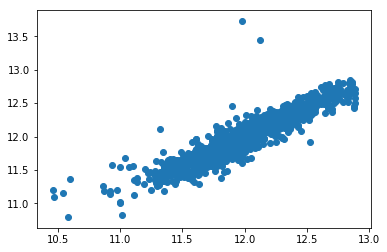

In [66]:
pylab.scatter(np.log(y), predictions)

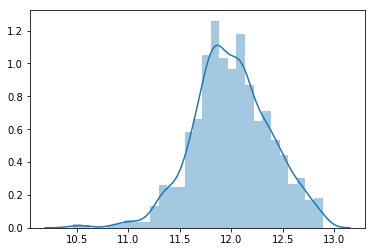

In [64]:
import seaborn as sns
sns.distplot(np.log(y))

In [71]:
features = data.columns[:-1]

## Save prredictions

In [72]:
test_data_submition = pd.read_csv('test.csv')
test_data_submition = test_data_submition[features]
test_data_submition = test_data_submition.fillna(test_data_submition.median())

prediction = np.expm1(model.predict(test_data_submition.to_numpy()))

y_predict_test_data = pd.DataFrame({'Id': test_data_submition['Id'],
                                    'SalePrice':prediction})
y_predict_test_data.to_csv("Submition_Stack.csv", index=False)